# Predicting House Prices: A Supervised Learning Approach    

### Juan E. Rolon, 2017.

## Project Overview  

In this project, we develop a supervised machine learning model that is trained and tested on data collected from homes in suburbs of Boston, Massachusetts.   

We aim to use the model to make certain predictions the price of a home. Our model has practical application in the real estate industry, in particular for an agent who could make use of the obtained information on a daily basis.

## Dataset

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing).   

The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:  

- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.  

- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.  

- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.  

- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.


## Loading the Dataset

We run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. 

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


/Users/juanerolon/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/juanerolon/anaconda/lib/python2.7/site-packages/sklearn/learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Exploratory Analysis. 

The main goal of this project is to construct a working model which has the capability of predicting the value of houses.   

In the following, we separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point.   

The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Descriptive Statistics  

In the code cell below, we implement the following:  

- Calculation of the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.  

- Storing of each calculation in their respective variable.

In [3]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Feature Observation  

We are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`.   

For each data point (neighborhood) we identify the following:  


- `'RM'` is the average number of rooms among homes in the neighborhood.  

- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor). 

- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** As a starting point we want to answer the following question:**

Does an increase in the value of the selected feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? 



To illustrate the answer for the question above I generated three scatter plots, shown after executing the cell below:  

/Users/juanerolon/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


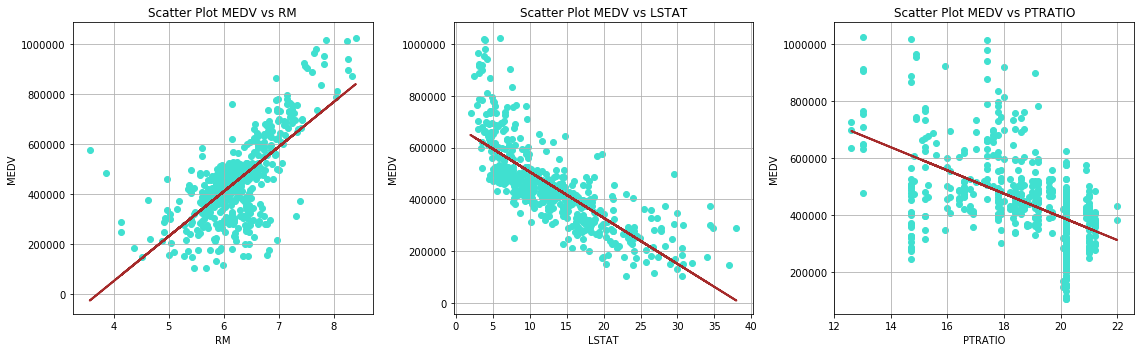

In [14]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(16, 5))

yname = 'MEDV'
fn =1

from sklearn.linear_model import LinearRegression
reglin = LinearRegression()


for feat in list(features.columns):

    plt.subplot(1, 3, fn)
    plt.xlabel(feat)
    plt.ylabel(yname)
    plt.title("Scatter Plot {} vs {}".format(yname,feat))
    reg_data = data[feat].reshape(-1,1)
    reglin.fit(reg_data,prices)
    plt.plot(reg_data,reglin.predict(reg_data),color='brown', linewidth=2)
    plt.scatter(features[feat], prices, color='turquoise')
    plt.grid(True)

    fn+=1

plt.tight_layout()
plt.show()



The plots above show the value of the **Price (MEDV)  vs. feature values**, i.e. **Price vs. RM**, **Price vs. LSTAT** and **Price vs. PTRATIO**, respectively. The plots also include a simple linear regression line to the data **only** to illustrate the overall dependence of Prices on each feature.

The **first plot** shows a trend indicating that Price increases with RM for RM > 5. So we can expect that a home with an RM value of 7 will be worth more than a home with an RM value than 6. 

The **second plot** shows that the Price decreases as LSTAT increases. Therefore a home with an LSTAT value of 20 has less value than a home with an LSTAT value of 15. In other words, the larger the percentage of lower class workers in the neighborhood, the less value is assigned to a home. 

The **third plot** shows that the data is inconclusive regarding the dependence of Price on PTRATIO (ratio of students to teachers). Despite a slight overall decrease with PTRATIO, the Price fluctuates strongly between the max and min Price values, indicating a weak dependence of home value on PTRATIO.



## Performance Metrics. 

Our initial performance metrics is the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>

The coefficient of determination for our model is a useful statistic, as we will implement a regression analysis, to describe how "good" the model is at making predictions. 

- The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**.   

- A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable.   

- Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

Specifically, we want to implement the following:  

- Using the `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.  

- Assign the performance score to the `score` variable.

In [6]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

## Shuffling and Splitting the Data   

In this step we split the data into training and testing subsets. We additionally randomize the order of the data when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In the code cell below, we implement the following:   

- We use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.   

- We split the data into 80% training and 20% testing.  

- We assign the train and testing dataset splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [8]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = \
train_test_split(features, prices, test_size=0.20, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


## Model Training and Testing

Testing the ML algorithm on a separate data set (separate from the training data set) helps in the design of performance metrics that could detect whether the ML algorithm was trained on highly specific features values or those arising mostly from random fluctuations of the training data, both of which could hold a weak causal relation to other features that are relevant and more general to the population under study.   

Given the above, the test/train data set split could help mitigate overfitting and underfitting and/or poor predictive power. In other words, we want to make sure that our algorithm actually learnt from the data, is necessary to test and obtain good model performance in unseen (testing) data that presumably should contain most of the characterizing patterns of the population under study.

## Analyzing Model Performance  

In this section of the project, we take a look at several learning and testing performances on various subsets of training data.   

Additionally, we investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance.  

We graph the model's performance based on different criteria that can be beneficial in the analysis process.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

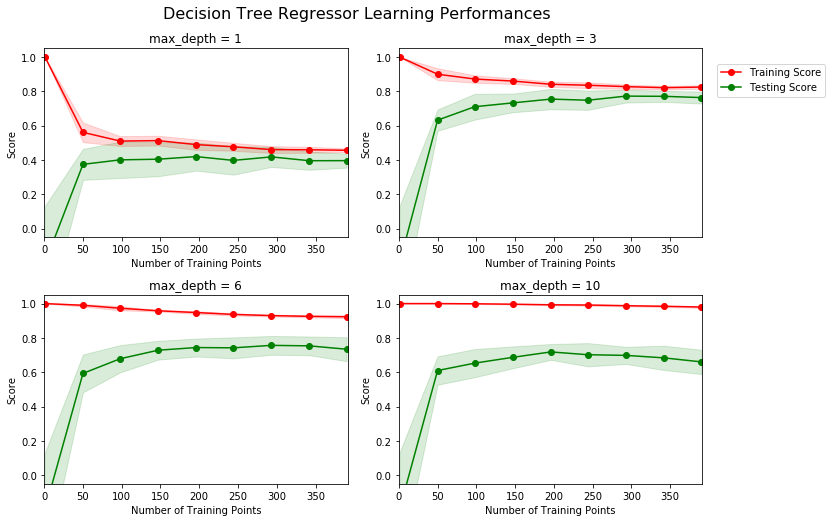

In [12]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Analysis:  

From the learning curves above we want to know whether the learning curves are converging to particular scores. In general, the more data we have, the better; however, we need to weigh on the pros and cons of adding more training points or if in fact the training and testing curves are converging.  

The following is observed in the learning curves:  

- The maximum depth of the model is 3.  

- The score of the training curve decreases as more instances are added to the training set.  

- The training score is almost perfect R^2 ~ 1 when training with a small number of instances (overfitting regime) and seems to converge to a more realistic value R^2 ~ 0.8 when adding more instances; the training score starts to plateau around 300 data points in the number of training data points.   

- The testing score is really "bad" R^2 < 0.5 when considering number of data points between 1 and 50 data points; in this regime the model lacks predictive power.    

- The testing score improves after considering number of data points larger than 150, and it starts to plateau and getting closer to the testing score when considering number of instances larger than 300. In other words, adding more than 300 training data points won’t benefit the model as the algorithm has already converged.

### Complexity Curves  

In the following we generate a graph for a decision tree model that has been trained and validated on the training data using different maximum depths.   

The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

We run the cell code below to obtain the complexity curve:

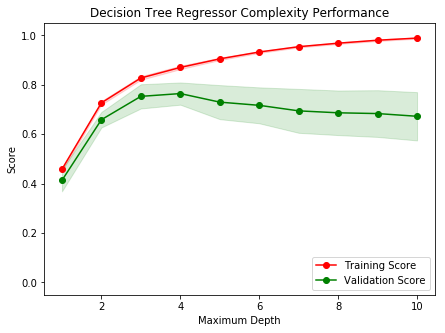

In [13]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff  

From the complexity curves above we want to answer the following questions:

- Does the model suffer from high bias or from high variance when trained with an increasing maximum depth? Say from 1 to a max depth of 10?  


- Which visual patterns in the in the complexity curve can help us justify our conclusions?

### Analysis:   

- High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting (the model is by-hearting the data and cannot generalize well).   


- When the model is trained with max_depth of 1 the model suffers from high bias (underfitting) as both the training and validation scores (~ 0.45) are quite below the lower bound for optimal scores ( ~0.8).   


- As max_depth is increased, both the training and validation scores increase; in particular, the variance of the validation score also increases monotonically (see shaded light green region) reaching a maximum high variance value about max_depth ~ 9.5.    


- An important visual aid to identify the bias/variance tradeoff behavior is to keep track of the GAP that separates the training and validation score curves.    


- For max_depth < 3 the model does not have enough complexity. Here, the variance is small but the bias is considerably high. In this regime, both training and validation scores are comparably low and the gap is thus small.    


- We notice that as we increase the model complexity (max_depth) the gap increases monotonically.   


- Near the optimal sweet spot located at max_depth ~ 4, both training and validation scores are high and comparable, thus the gap reaches optimal separation. Here the model has low bias and optimal variance, i.e. optimal complexity and consequently optimal performance.   


- Beyond the optimal sweet spot (max_depth > 4), the gap between the training and validation curves keeps increasing as max_depth increases. This increase in max_depth yields a decrease in the validation score resulting from an increase in variance. In other words, the models starts becoming too complex.   


- We also notice a simultaneous increase in training score for max_depth > 4. This signals overfitting behavior identified by an increasingly larger gap between the curves. The gap becomes maximum when the complexity level is maximum at around max_depth = 10. In this regime, the model has the largest variance and overfitting behavior.   


### Best-Guessing the Optimal Model   

When looking closer at the complexity curve, we see where the validation scores lie for the various depths that have been assigned to the model. From inspection we conclude the following:  

- From pure visual inspection, a max_depth between 3 and 4 appear to be optimal for this model.    


- A max_depth below 3 value causes the model to have a high bias and poor performance scores. A max_depth above 4 increases the training score only, and reduces the validation score while increasing the model's variance, trends which are consistent with an overfitting behavior.


## Tuning and Evaluating Model Performance using Grid Search   

In this final section of our analysis, we construct a machine learning model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Analysis: 

When deciding to choose among competing models to optimally solve a given problem, a fine-tuning step of a subset of relevant model hyper-parameters (those not directly learnt with the estimators, but related to the particular instantiation of machine learning class or statistical model is necessary.   

To accomplish the above we use *grid search* to find a specific combination of hyper-parameters (over which the model is trained and validated) yielding the (previously selected) optimal performance score metric (best cross validation score) during the model validation step. 

The main steps followed in a grid search consist of: 

1. Selecting an estimator (regressor or classifier)   

2. Selecting a parameter space (specify the hyper-parameters to be varied; this selection generates a grid in hyper-parameter space constructed by the Cartesian product of the axes represented by each hyper-parameter)   

3. Selecting a searching method or sampling candidates (this defines the specifics as to how the algorithm will traverse the entire grid defined in step 2; as this brute-force process can be computationally expensive in big data sets, algorithmic complexity and distributed computing (GPU grid, Hadoop cluster, etc.) implementation schemes also need to be taken into account.   

4. Selecting a cross-validation scheme and an appropriate score function.

### Cross-Validation

To accomplish the cross-validation step mentioned above, we use *k-fold cross validation*, as technique often benefits the grid search procedure. We can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for more information.

### Analysis:  

- The k-fold cross-validation method consist in randomly splitting the training dataset into k folds without replacement. k-1 folds are used for the training phase and one fold is used for testing.    


- The split into folds happens only once and the selection of folds for training and validation is repeated k times, making available to us k different models and performance estimates. The estimates are averaged to obtain a performance metric which is less sensitive to the partitioning of the training data in comparison to a simple (two-fold) partition of the dataset.    


- The advantage of using k-fold cross-validation is that it could yield a better performance metric indicating good model flexibility (lower variance). Notice that during each fold, a sample point (or instance) is part of the training or test dataset only once. In other words, k-fold cross-validation avoids reusing data points repeatedly and helps reducing overfitting.

## Model Implementation, Optimization and Fitting Procedure.  

In the following, we bring together all the points discussed prviously and implement a *supervising learning* approach to train our model using the **decision trees**.   

To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter of the decision tree.    

The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction.

In addition, we use `ShuffleSplit()` for an alternative form of cross-validation (see the `'cv_sets'` variable). While it is not the K-Fold cross-validation technique we described earlier, this type of cross-validation technique is just as useful!.   

The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*.   


In the cell code below we implement the following:  

- We use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.    

- We assign this object to the `'regressor'` variable.   

- We create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.      


- We use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.   

  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.  
  
- We use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.



In [ ]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

from sklearn.metrics import make_scorer, explained_variance_score, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params,scoring=scoring_fnc,cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

## Predictions   

Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**.    

We can use the predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Optimal Model

We run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


As shown above, the optimal max_depth is 4, according to the implemented grid search procedure. This result is consistent with the visual inspection of the complexity curve analysis discussed earlier in the text.

## Predicting House Selling Prices   

We aim to use our optimized model to predict the price of homes owned by real state clients.  In the following table we present data collected by a real estate agent in the Boston area in 1978. 

 
| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


For this case, we want to do the following:

* Provide a recommendation to each client for his/her home selling price. 
* Determine whether the selling price is consistent with the respective home features.

We run the code block below to make selling price predictions (using the optimized model) for each home:

In [11]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


### Analysis: 

The predicted selling prices are consistent with our Data Exploraton statistics. A figure illustrating the visual inspection of our Data Exploration results together with the predicted prices for the trhee clients appears below. 

The figure indicates that the predicted selling prices are within the Minimum price: 105,000.00 and Maximum price (1,024,800.00) of home prices sold in boston during the studied period, taking into account a standard deviation of 165,340.28.  

In particular, the predicted price for Client 1 seems to represent a value which is close both to the mean price (454,342.94) and median price (438,900.00) of houses sold in Boston, a result that is consistent for the specified home characteristics, i.e. the characteristics of the home to be offered to Client 1 seem to be closer to average, as opposed to Client 2 and 3 respectively, which represent homes in the lower end and high end of real state value, respectively. 

Furthermore, since LSTAT (percentage of low income homeowners in the neighborhood) is the feature that causes a decrease in selling price, it is reasonable that the selling price for Client 2 (LSTAT = 32%) to be closer to the minimum price and for Client 3 (LSTAT=3%) to the maximum. To verify this, we can approximately pinpoint the y label (MEDV i.e. Price) in the scatter plot "MEDV vs LSTAT" appearing below.  

For LSTAT=32% and LSTAT=3%, the y value in both cases is consistent ("close to") with the predicted selling prices of 237,478.72 and 931,636.36, respectively. (Also, please see the discussion of the LSTAT feature in Question 11).

Finally, since we have carried out an optimization and cross-validation of our predictive model, i.e. improved the level of confidence of our predictions in terms of reduced bias and variance, I would recommend to each one of the clients to sell their homes according to the predicted selling price generated by our model:

Predicted selling price for Client 1's home: 403,025.00
Predicted selling price for Client 2's home: 237,478.72
Predicted selling price for Client 3's home: 931,636.36


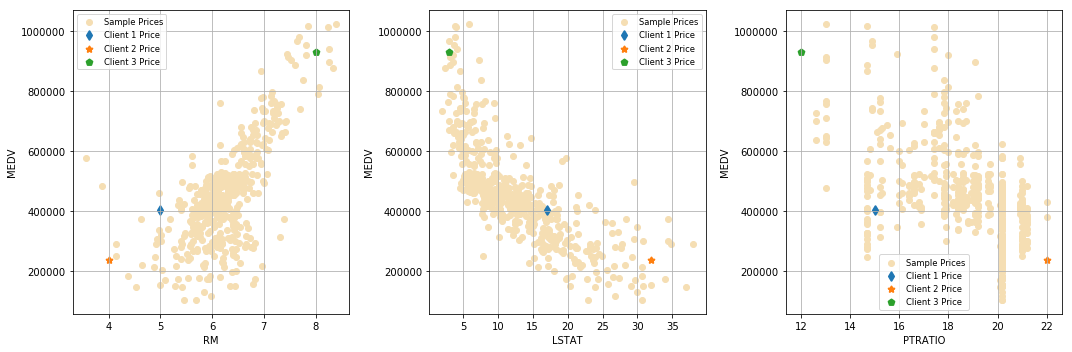

In [16]:
client_data_trp = np.transpose(client_data)
predictions = reg.predict(client_data)
markings = ['d', '*', 'p']
labelings = ['Client 1 Price', 'Client 2 Price ', 'Client 3 Price']
plt.figure(1, figsize=(15, 5))
yname = 'MEDV'
fn = 1
for feat in list(features.columns):
    plt.subplot(1, 3, fn)
    plt.xlabel(feat)
    plt.ylabel(yname)
    plt.scatter(features[feat], prices, color='wheat', label='Sample Prices')

    for m in range(len(predictions)):
        plt.scatter(client_data_trp[fn - 1][m], predictions[m], marker=markings[m], label=labelings[m], linewidths=2)

    plt.legend(fontsize='small')
    plt.grid(True)
    fn += 1
plt.tight_layout()
plt.show()

## Sensitivity Analysis 

In this section we determine whether our model is a robust model. We want to find out whether we developed a model has the complexity necessary to generalize to new data, and if is appropriate for the structure of the data given.

We run the code cell below to excecute the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on:

In [11]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


## Model applicability

Using the results above we want to answer the following questions:  

- Is data that was collected from 1978 relevant to todays context?  
- Is inflation an important factor to consider in our analysis?
- Are the features present in the data sufficient to describe a home?
- Do factors like quality of apppliances in the home, square feet of the plot area, presence of pool, etc. important?
- Is the model robust enough to make consistent predictions?
- Would data collected in an urban city like Boston be applicable in a rural city?
- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

## Analysis:    

- As the model has predictive power within the scope of the given dataset, the model may be used in a real-world setting as a first approximation during the prototyping phase. However, we need to be cautious as the data is very old, and we need to check whether old features values apply to the current problem. In fact, datasets need to be cleaned and updated regularly for consistency and effective applicabilty. 

- The first thing to notice is that the range of variation in predicted prices (73,357.39) is less than the standard deviation of prices (165,340.28) obtained from the entire data set, and approximately 17.7% of the media predicted price (412,815.5). This hints to a reasonable robustness of the model. Caution needs to be considered again as the standard deviation of prices is taken over the whole dataset with different homes, while the variability of the trials refers to the same home. Altogether, this implies that the sensitivity of the model predictions is moderately robust for the chosen selections of training and testing datasets given above. 

- Inflation amounts to a constant shift in home values which is independent of the features under consideration. So inflation can be incorporated as a scaling factor in the predicted selling prices. 

- Among the extra features, such as quality of appliances, square feet in plot area, or pool presence, only square feet of plot area is worth considering to be added to our model; in doing so, we will increase slightly the level of complexity and perhaps the variance in predicted prices; the other features (appliances, installed pool) are unnecessary as they are rarely prevalent in homes.

- The model and data collected for Boston would not be directly applicable to a rural city, but can serve as a first approximation. There are other features relevant to a rural setting that could affect selling price (i.e. proximity to school districts -not necessarily in neighborhood-, proximity to schools, proximity to commercial centers or supermarkets, proximity to paved roads, etc.).

- It is clear that one should judge the price of an individual home based on the characteristics of the entire neighborhood. The reason is that a home is a container for objects (persons) which are not isolated but that interact strongly with their environment (neighborhood). 

## Important Features for House Price Prediction


It is possible to show that the neighborhood-defined feature, LSTAT, is the one making the largets contribution to home price forecasting, the feature yields the strongest criterion to define a home selling price.    

The bar chart added below illustrates the contribution of each feature. (The bar chart shows the Gini importance of each feature as implmented in scikit-learn DecisionTreeClassifier).

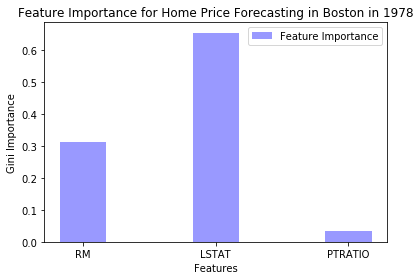

In [17]:
n_groups = len(reg.feature_importances_)
impdata = reg.feature_importances_
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
rects1 = plt.bar(index, impdata, bar_width, alpha=opacity, color='b', label='Feature Importance')
plt.xlabel('Features')
plt.ylabel('Gini Importance')
plt.title('Feature Importance for Home Price Forecasting in Boston in 1978')
plt.xticks(index, list(X_train.columns))
plt.legend()
plt.tight_layout()
plt.show()

In summary, non-local features such as neighborhood poverty level are hihgly important when setting the value of a home, in addition to other features such as number of rooms or students/teachers ratio, as indicated by the results and analyses presented in the present analysis.